# Example of the LogisticModel

To give a demonstration of the LogisticModel class. I simulated 1,000 $X_i$ data points, where $X_i \sim N(0, 1)$. I then created 1,000 probabilities, $p_i$, where $p_i = \frac{1}{e^{-(\beta_0 + \beta_1 X_i)}}$, so the logistic model is appropriate, and used those probabilities to generate the target binomial variable vector, $y$, where $y_i \sim \text{Bernoulli}(p_i)$. The true values for the coefficients are: $\beta_0 = 1$ and $\beta_1 = 2$

### Data is generated in the cell below.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from BayesianLinearRegression import LogisticModel

# Set a random seed for repoducibility.
random_seed = 1
np.random.seed(random_seed)

# Set the intercept and slope of the simulated data
intercept = 1
slope = 2

# Define a function to describe the simulated data generating process.
def my_line(intercept, slope, X):
    return intercept + slope*X

# Draw 1000 values of X ~ N(0, 5).
X = np.random.normal(loc=0, scale=1, size=1000)
# Create probabilities from the logistic regression model: intercept + slope*X
probabilities = 1 / (1 + np.exp(-my_line(intercept, slope, X)))
# Create an array of the target data.
y = np.random.binomial(1, probabilities, size=X.shape[0])
# Reshape X and y to be column vectors.
X = X.reshape((-1,1))
y = y.reshape((-1, 1))

A LogisticModel object is created below and it's fit method is used to simulate the posterior distributions of the coefficients. The predict method is demonstrated as well, but it predicts in log-odds. To predict probabilities, the *predict_probabilities* method must be used. To predict the class of the input data, the *predict_class* method must be used. Both are demonstrated as well.

In [3]:
logistic_model = LogisticModel()

# Set the prior means and standard deviations of the two coefficients whose
# posterior distributions we will simulate.
prior_means = np.repeat(0.0, 2)
prior_stds = np.repeat(0.1, 2)
# Set the standard deviations of the jumping distributions for each 
# coefficient.
jumping_stds = np.repeat(0.01, 2)
# Set the number of iterations to use in the Metropolis-Hastings posterior
# simulation process.
n_iter = 50000
# We are adding an intercept to the input data.
add_intercept = True
# Use the median of the posterior distributions as the point estimate of the
# coefficients.
method = "median"
# Burn-in the first 10% of the samples.
burn_in = 0.1
# Set alpha to 0.05 because we are interested in the 95% credible intervals of
# the coefficients.
alpha = 0.05

# Simulate the posterior distributions of the coefficients and fit the 
# logistic regression model.
logistic_model.fit(y,
                   X,
                   prior_means,
                   prior_stds,
                   jumping_stds, 
                   n_iter,
                   add_intercept,
                   method,
                   burn_in,
                   alpha,
                   random_seed)

# Use the fitted model to predict log-odds.
predicted_log_odds = logistic_model.predict(X)
# Use the fitted model to predict log-odds.
predicted_probabilities = logistic_model.predict_probabilities(X)
# Use the fitted model to predict log-odds.
predicted_classes = logistic_model.predict_classes(X)

100%|██████████| 50000/50000 [01:51<00:00, 449.39it/s]


The medians of the posterior distributions of the coefficients are close to their true values, but both are below their true values. The 95% credible intervals are displayed as well and both contain the true values, although barely for the intercept. The model predicts 78.2% of observations compared to a no-information rate of 64.5%, so it is an improvement of just guessing the most common class ($1$).

A plot of the simulated joint distribution of the coefficients and a plot of the probability of belonging to class $1$ with the true and predicted probability is included below.

In [4]:
print(f"{method} of the simulated posterior of the intercept: "
      f"{round(logistic_model._beta_hat[0][0], 4)}; true value: {intercept}")
print(f"{method} of the simulated posterior of the slope: "
      f"{round(logistic_model._beta_hat[1][0], 4)}; true value: {slope}")
print()
print(f"{100*(1-alpha)}% Credible Interval for the intercept: "
      f"{tuple(logistic_model._credible_intervals[0])}")
print(f"{100*(1-alpha)}% Credible Interval for the slope: "
      f"{tuple(logistic_model._credible_intervals[1])}")
print()
print(f"The fit model predicts {100*(predicted_classes == y).sum()/len(y)}% "
      "of the observations correctly. The no-information rate is "
      f"{100*y.sum()/len(y)}%")

median of the simulated posterior of the intercept: 0.8398; true value: 1
median of the simulated posterior of the slope: 1.8484; true value: 2

95.0% Credible Interval for the intercept: (0.6873652481563429, 1.002174705047442)
95.0% Credible Interval for the slope: (1.620589562715642, 2.127019246646442)

The fit model predicts 78.2% of the observations correctly. The no-information rate is 64.5%


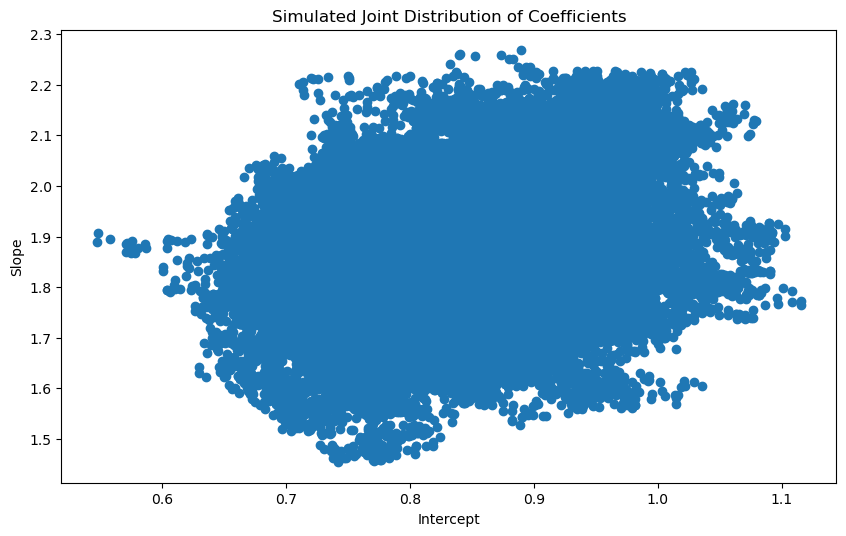

In [5]:
# Plot the simulated joint distribution of the two coefficients.
plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(logistic_model._beta_distribution[0], 
            logistic_model._beta_distribution[1])
plt.title('Simulated Joint Distribution of Coefficients')
plt.xlabel('Intercept')
plt.ylabel('Slope')
plt.show()

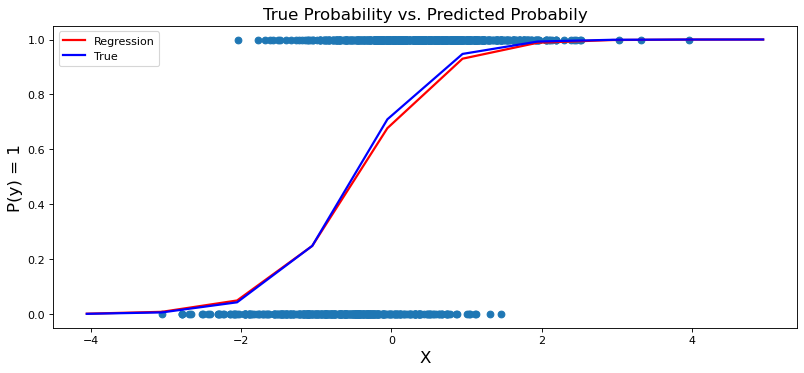

In [6]:
# Create an array covering the range of the X data.
X_range = np.arange(X.min()-1, X.max()+1, 1)
# Use the values covering the range of X to make the regression line.
regression_line = logistic_model.predict_probabilities(X_range.reshape((-1,1)))
# Use the values covering the range of X to make the true line.
true_line = 1 / (1 + np.exp(-my_line(intercept, slope, X_range)))

plt.figure(figsize=(12, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.scatter(X, y)
plt.plot(X_range, regression_line, 
         linewidth=2, color='red', label='Regression')
plt.plot(X_range, true_line, 
         linewidth=2, color='blue', label='True')
plt.title('True Probability vs. Predicted Probabily', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('P(y) = 1', fontsize=15)
plt.legend(loc='upper left')
plt.show;